In [1]:
#Required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
import torch
import itertools
import os

In [2]:
#Reading dataset into dataframe. 
df = pd.read_pickle('../data/raw/emotions_training.pkl')

In [3]:
#The dataset is already cleaned and preprocessed
df.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


##### Exploring the statistics of the data

In [4]:
#Number of rows in the dataframe
df.shape

(416809, 2)

In [5]:
#Count of each emotion in the dataset
df['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

In [6]:
#Percentage of data for each emotion
df['emotions'].value_counts(normalize=True)*100

joy         33.844519
sadness     29.074948
anger       13.751383
fear        11.446970
love         8.290128
surprise     3.592053
Name: emotions, dtype: float64

In [7]:
df=df.reset_index()

In [8]:
df['text'][0]

'i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here'

In [9]:
#Getting the count of words in each row. 
df['number_words']=df['text'].str.split().apply(len)

In [10]:
df.head()

,index,text,emotions,number_words
0,27383,i feel awful about it too because it s my job ...,sadness,26
1,110083,im alone i feel awful,sadness,5
2,140764,ive probably mentioned this before but i reall...,joy,27
3,100071,i was feeling a little low few days back,sadness,9
4,2837,i beleive that i am much more sensitive to oth...,love,18


In [11]:
df['number_words'].min(),df['number_words'].max(), df['number_words'].median()

(1, 178, 17.0)

In [12]:
df[df['number_words'] == 1].count()

index           26
text            26
emotions        26
number_words    26
dtype: int64

In [13]:
df.loc[df['number_words'] == 1, ['text','emotions']]

,text,emotions
43237,summer,sadness
45779,salo,anger
79308,sadness,sadness
112034,recently,sadness
124403,someone,anger
128410,in,fear
131282,yesterday,anger
154126,depressions,sadness
170335,once,anger
202327,sometimes,sadness


The minimum words in each sample is 1 and is further explored to know whether the single word is directly the emotion itself. But surprisingly, the words and the corresponding emotion doesn't relate in most of the words among 26 samples. Consider, the rows where the word is when, the emotion is different each time and also meaningless. But as 26 rows among the total data of >400K is negligible. 

In [14]:
df[df['number_words'] == 178].count()

index           1
text            1
emotions        1
number_words    1
dtype: int64

In [15]:
df.loc[df['number_words'] == 178, ['text','emotions']]

,text,emotions
369479,a few days back i was waiting for the bus at t...,anger


In [16]:
df['text'][369479]

'a few days back i was waiting for the bus at the bus stop before getting into the bus i had prepared the exact amount of coins to pay for the bus fair and when i got into the bus i put these coins into the box meant to collect the bus fair i thought that i had paid and wanted to get inside however the bus driver called me and asked me in an impolite way if the coins were stuck at the opening of the box he had not seen me paying and there wasnt a stack of coins in the box i could not understand this and the driver kept questioning me he made me feel angry and at last i inserted a dollar coin in the box just to get away from him later i found that i had forgotten a few coins in my pocket and had not paid enough for the fair the first time after i had entered the bus i could still hear him scolding me and i felt disgusted'

##### Visualization of data

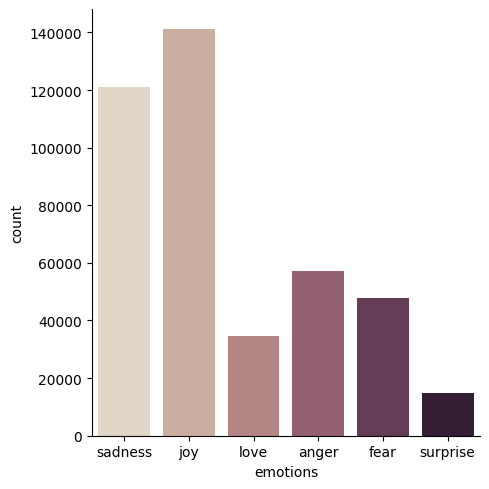

In [12]:

sns.catplot(data=df, x="emotions", kind="count", palette="ch:.25")


<AxesSubplot: >

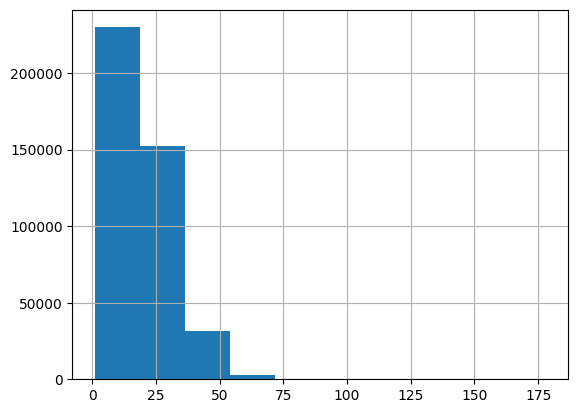

In [16]:
df['number_words'].hist()

In [17]:
#Check the distribution of number of words 
text_3std = df['number_words'][~((df['number_words'] - df['number_words'].mean()).abs() > 3*df['number_words'].std())]

In [18]:
print(text_3std.skew()) 
print(text_3std.mean()) 

0.8149718127967273
18.842533478384123


<AxesSubplot: >

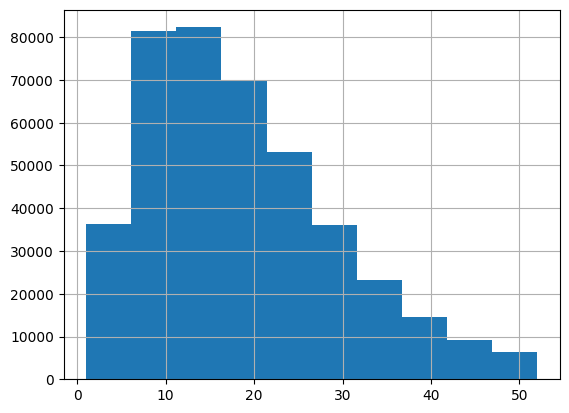

In [19]:
text_3std.hist()